# **STELLAR CLASSIFICATION**

Importing libraries

In [94]:
import numpy as np
import pandas as pd

In [95]:
#data uploaded by mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
data= pd.read_csv('/content/drive/MyDrive/star_classification._ds.csv')

<ipython-input-96-84592336049c>:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('/content/drive/MyDrive/star_classification._ds.csv')


In [97]:
data.head()

,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

<Axes: >

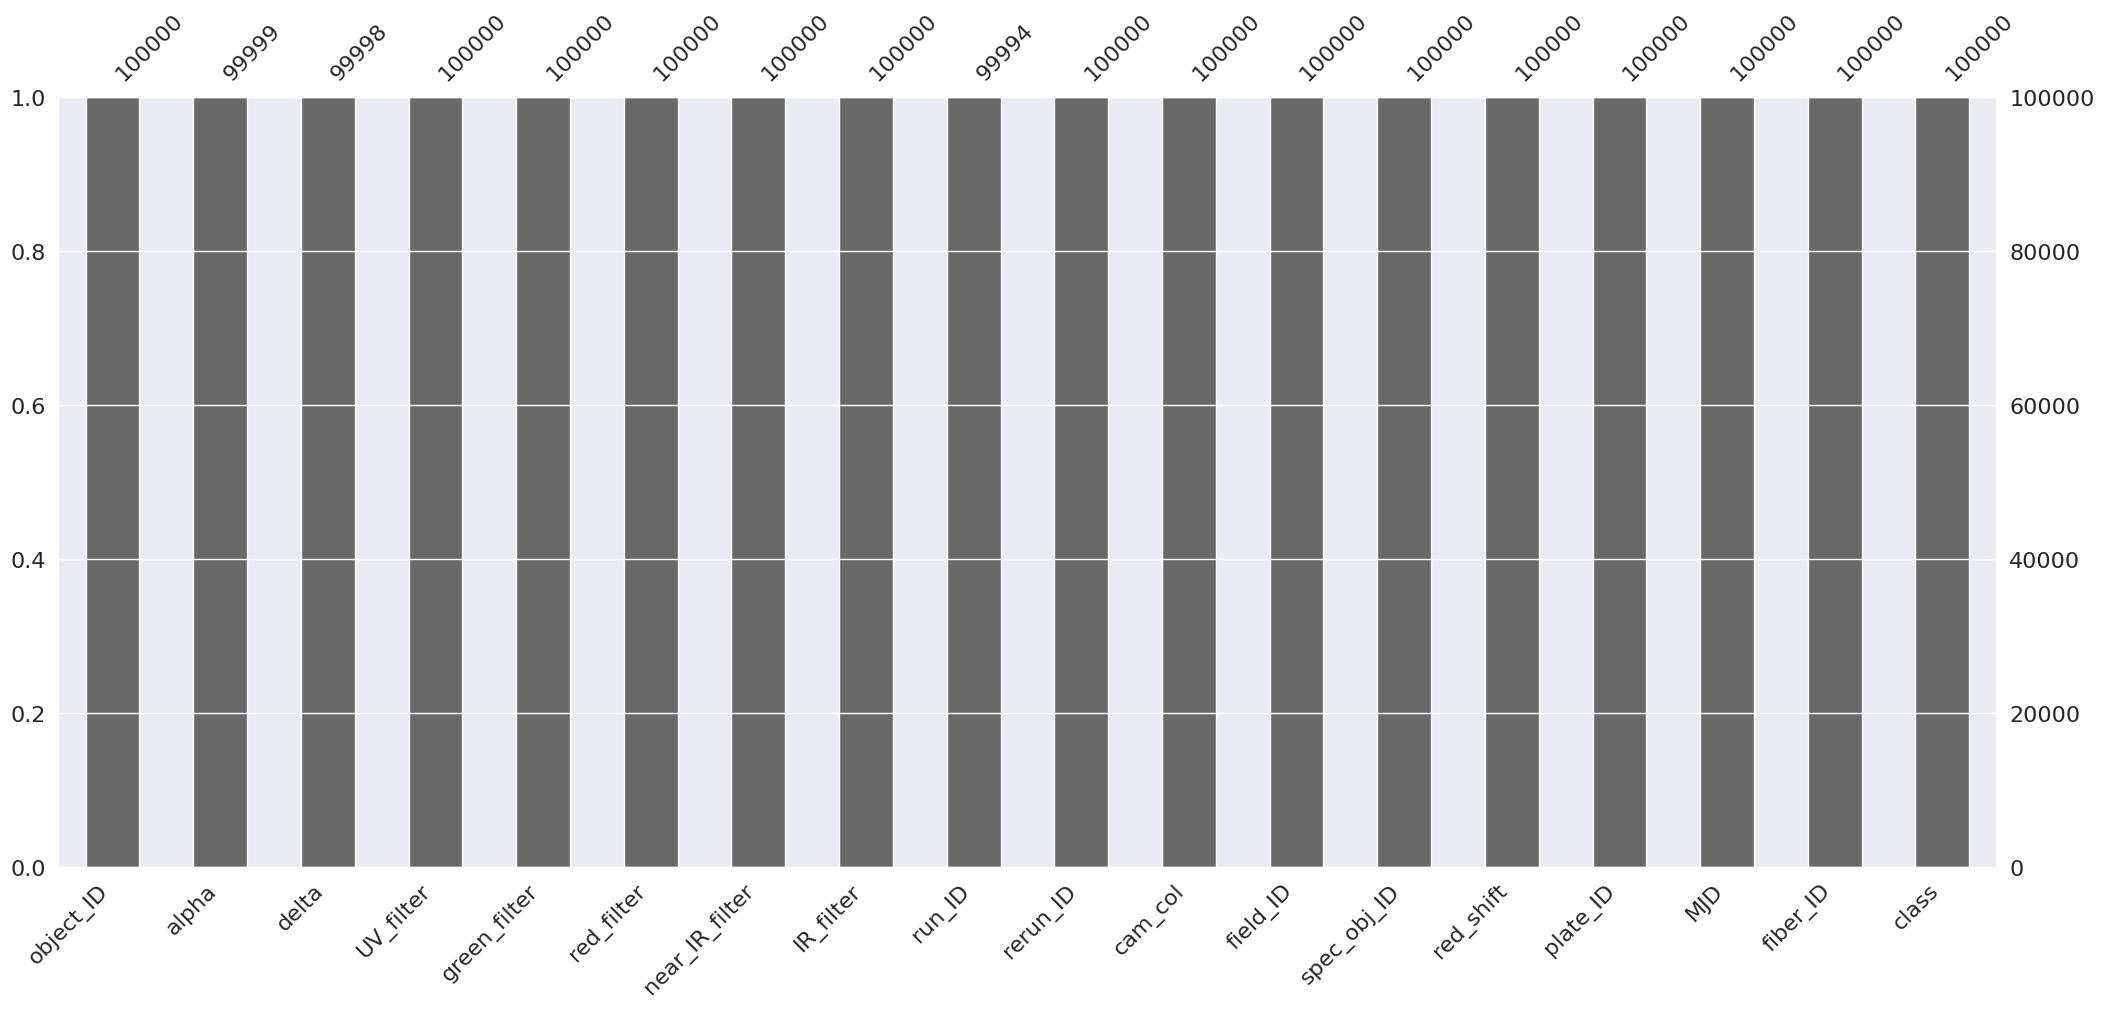

In [99]:
#bar graph for missing values
import missingno as ms
ms.bar(data)

In [100]:
data = data.drop(['object_ID'],axis=1)
data = data.drop(['rerun_ID'],axis=1)
data.drop_duplicates()
data

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.060000e+19,0.000000,9374,57749,438,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.590000e+18,0.404895,7626,56934,866,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.110000e+18,0.143366,2764,54535,74,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.600000e+18,0.455040,6751,56368,470,GALAXY


In [101]:
data.isnull().sum()

alpha             1
delta             2
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            6
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [102]:
#replacing null with nan
# data['run_ID'] = data['run_ID'].replace("NULL", np.nan)
# data
# data1['run_ID'] = data1['run_ID'].replace('NULL', np.nan)

In [103]:
#Mean Imputation

cols = ['run_ID','alpha','delta']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

data['run_ID'] = data['run_ID'].fillna(data['run_ID'].mean())
data['alpha'] = data['alpha'].fillna(data['alpha'].median())
data['delta'] = data['delta'].fillna(data['delta'].std())
data



,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606.000000,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518.000000,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606.000000,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192.000000,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,4481.391627,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778.000000,2,581,1.060000e+19,0.000000,9374,57749,438,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917.000000,1,289,8.590000e+18,0.404895,7626,56934,866,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314.000000,4,308,3.110000e+18,0.143366,2764,54535,74,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650.000000,4,131,7.600000e+18,0.455040,6751,56368,470,GALAXY


In [104]:
data.isnull().sum()

alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

<Axes: >

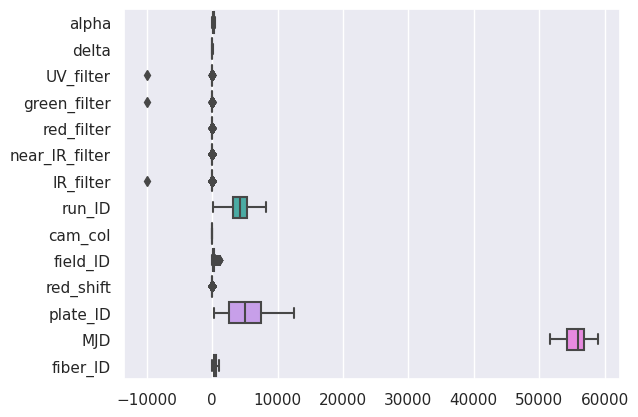

In [105]:
#Outliers
data = data.drop(['spec_obj_ID'],axis=1)
# Box Plot
import seaborn as sns
sns.boxplot(data,orient='h')



<Axes: >

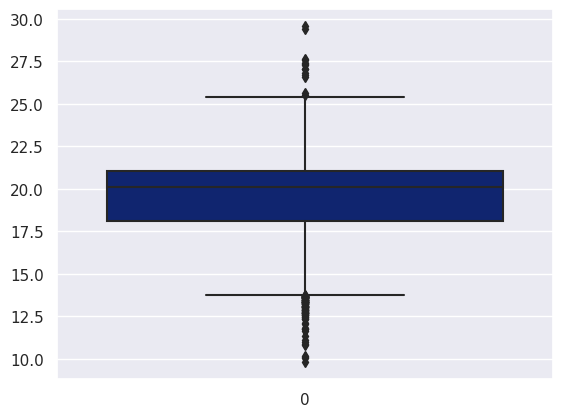

In [106]:
import seaborn as sns
sns.boxplot(data['red_filter'])

In [107]:
from scipy import stats
#Removing outliers Z-score
z_threshold=3

z_scores = np.abs(stats.zscore(data.iloc[:,:-1]))

# Create a mask to identify outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

# Remove rows with outliers
df_no_outliers = data[~outlier_mask]

# Display the DataFrame with outliers removed
print(df_no_outliers)

            alpha      delta  UV_filter  green_filter  red_filter  \
0      135.689107  32.494632   23.87882      22.27530    20.39501   
1      144.826101  31.274185   24.77759      22.83188    22.58444   
2      142.188790  35.582444   25.26307      22.66389    20.60976   
3      338.741038  -0.402828   22.13682      23.77656    21.61162   
4      345.282593  21.183866   19.43718      17.58028    16.49747   
...           ...        ...        ...           ...         ...   
99995   39.620709  -2.594074   22.16759      22.97586    21.90404   
99996   29.493819  19.798874   22.69118      22.38628    20.45003   
99997  224.587407  15.700707   21.16916      19.26997    18.20428   
99998  212.268621  46.660365   25.35039      21.63757    19.91386   
99999  196.896053  49.464643   22.62171      21.79745    20.60115   

       near_IR_filter  IR_filter       run_ID  cam_col  field_ID  red_shift  \
0            19.16573   18.79371  3606.000000        2        79   0.634794   
1            

In [108]:
df_no_outliers.head()

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,cam_col,field_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606.000000,2,79,0.634794,5812,56354,171,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518.000000,5,119,0.779136,10445,58158,427,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606.000000,2,120,0.644195,4576,55592,299,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192.000000,3,214,0.932346,9149,58039,775,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,4481.391627,3,137,0.116123,6121,56187,842,GALAXY


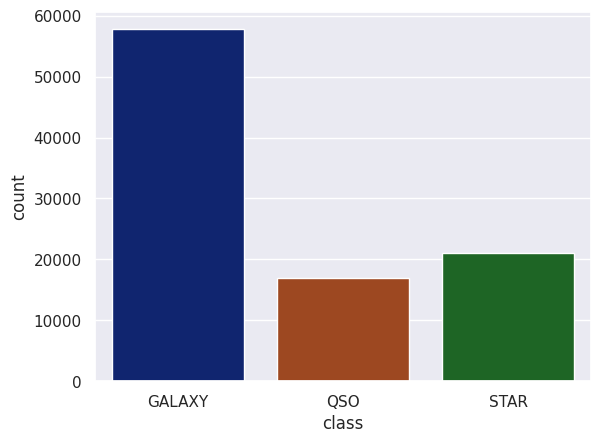

In [109]:
import matplotlib.pyplot as plt

sns.set(style='darkgrid', palette='dark')
sns.countplot(x = df_no_outliers['class'])
plt.show()


<ipython-input-110-b882534d7f9e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outliers.red_shift, color="midnightblue")


<Axes: xlabel='red_shift', ylabel='Density'>

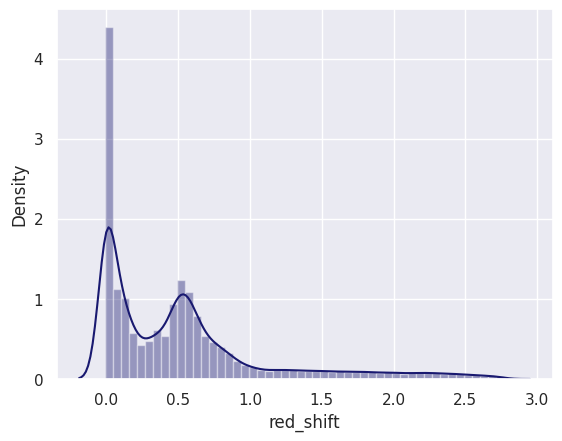

In [110]:
sns.distplot(df_no_outliers.red_shift, color="midnightblue")

<ipython-input-111-7796d98a8c73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outliers.plate_ID, color="midnightblue")


<Axes: xlabel='plate_ID', ylabel='Density'>

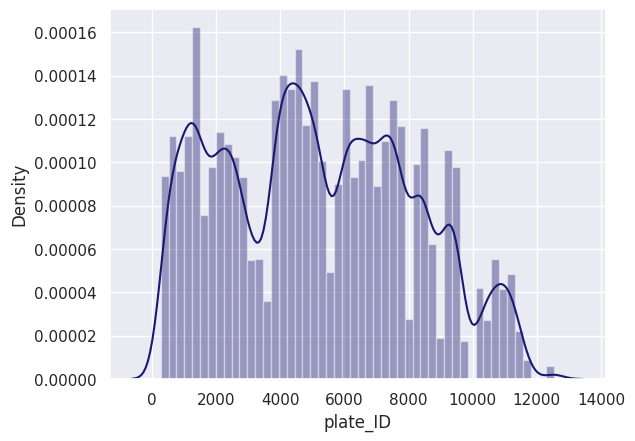

In [111]:
sns.distplot(df_no_outliers.plate_ID, color="midnightblue")

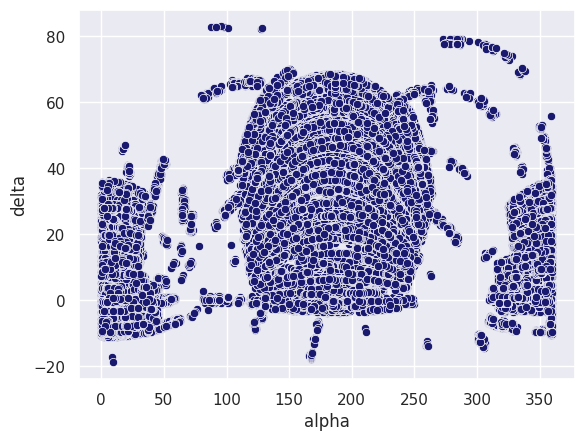

In [112]:
sns.scatterplot(x = df_no_outliers.alpha, y = df_no_outliers.delta, color="midnightblue")
plt.show()

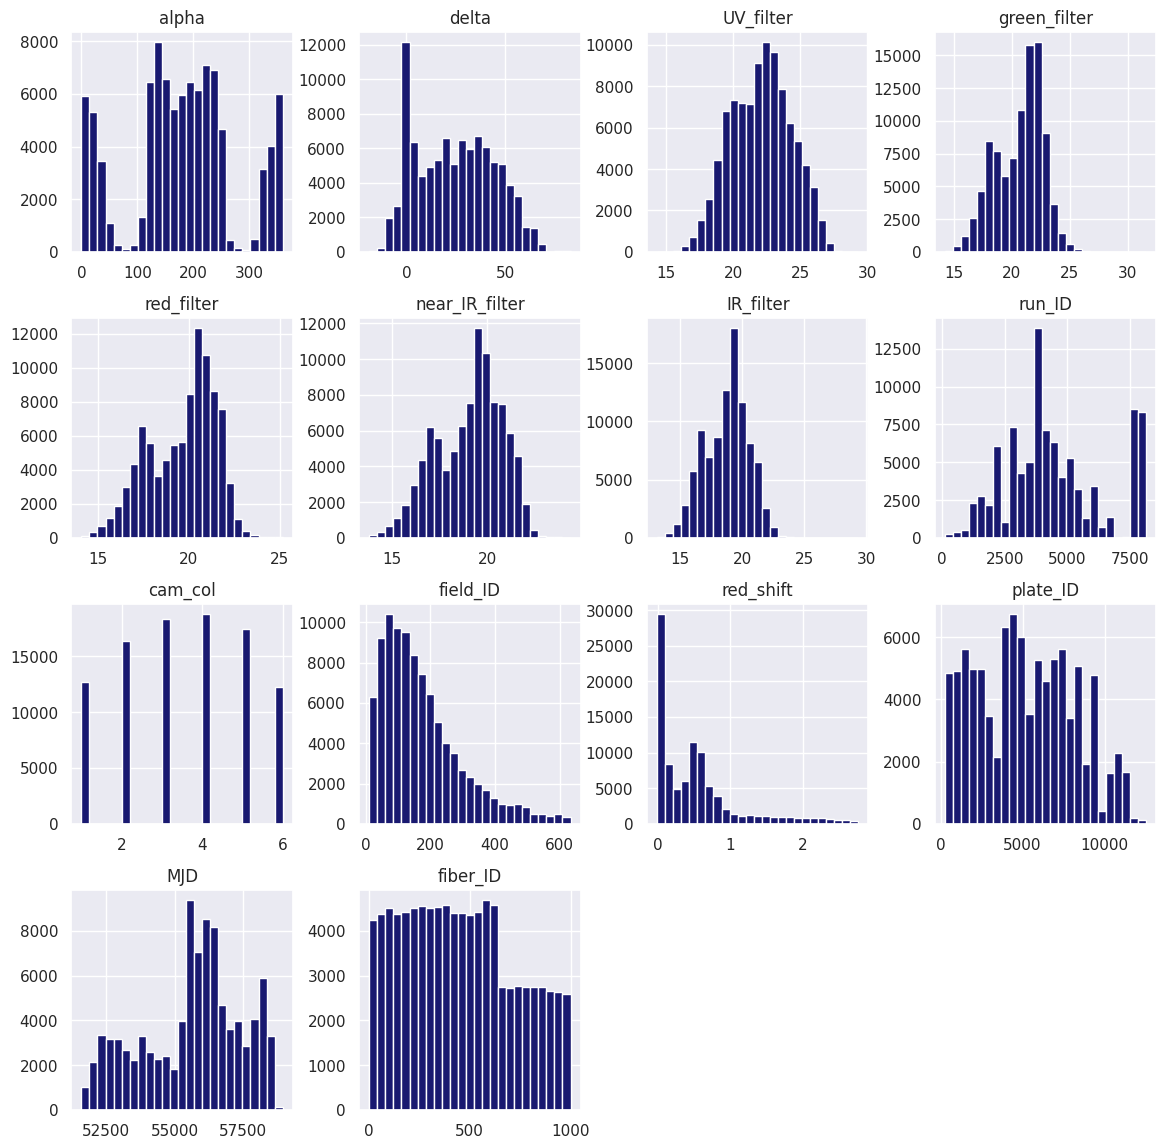

In [113]:
df_no_outliers.hist(bins =25 , figsize= (14,14), color="midnightblue")
plt.show()

<ipython-input-114-c9a7ed24e132>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_no_outliers.corr()


<Axes: >

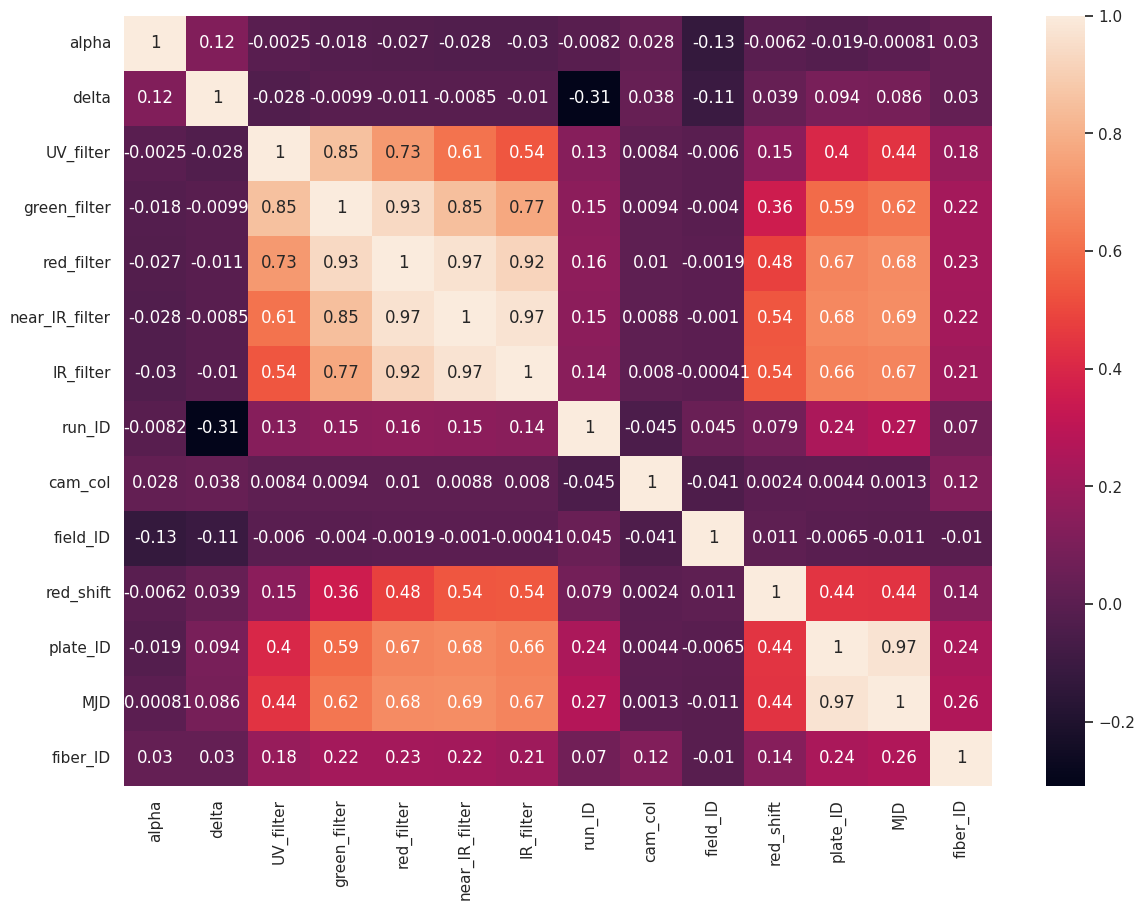

In [114]:
# Heatmap for expressing correlation

plt.figure(figsize=(14,10))
corr = df_no_outliers.corr()
sns.heatmap(corr,annot=True)

Label Encoding

In [115]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_no_outliers['class'] = LE.fit_transform(df_no_outliers['class'])

<ipython-input-115-4623ac64d85d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['class'] = LE.fit_transform(df_no_outliers['class'])


In [116]:
distinct= df_no_outliers['class'].value_counts()
distinct

0    57765
2    21017
1    16975
Name: class, dtype: int64

In [117]:
df_no_outliers['class'].value_counts()

0    57765
2    21017
1    16975
Name: class, dtype: int64

In [118]:
X = df_no_outliers[['UV_filter', 'green_filter', 'red_filter', 'near_IR_filter', 'IR_filter', 'red_shift', 'plate_ID']]
X

,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,plate_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751


In [119]:
y = df_no_outliers['class']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 95757, dtype: int64

Resampling

In [120]:
# SMOTE (Synthetic Minority Over-sampling Technique) technique from the imblearn library, which is commonly used in machine learning for addressing class imbalance issues in datasets.
#  This technique helps in oversampling the minority class to balance the class distribution.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, y_res = sm.fit_resample(X, y)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res=scaler.fit_transform(X_res)
print(X_res)


[[ 1.03808467  0.9394548   0.36980887 ... -0.13701109 -0.02411907
   0.12239349]
 [ 1.46716402  1.2314535   1.59542482 ...  1.47145877  0.17038797
   1.6566138 ]
 [ 1.69893571  1.14332087  0.49002327 ... -0.04887075 -0.01145099
  -0.28690853]
 ...
 [-1.33063568 -1.76777005 -1.85878603 ... -1.71077602 -0.87999292
  -1.0813386 ]
 [-1.74848667 -1.85235976 -1.76552144 ... -1.50451823 -0.87993311
  -0.99225912]
 [ 1.13528475  1.306817    0.80002469 ... -0.38686739 -0.87964078
  -0.96576708]]


In [122]:
y.value_counts()

0    57765
2    21017
1    16975
Name: class, dtype: int64

In [123]:
y_res.value_counts()

0    57765
1    57765
2    57765
Name: class, dtype: int64

In [124]:
y_res

0         0
1         0
2         0
3         0
4         0
         ..
173290    2
173291    2
173292    2
173293    2
173294    2
Name: class, Length: 173295, dtype: int64

Splitting dataset

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state = 30)

Classification Algorithms

In [126]:
# Creating the dataframe in which we'll store the accuracy scores of all the classification algorithms so we can choose the best one.
score_df = pd.DataFrame(columns=['Algorithm', 'Recall score','Precision','F1 score'])

In [127]:
score_df

,Algorithm,Recall score,Precision,F1 score


In [128]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

from sklearn.metrics import recall_score
LR_recall = recall_score(y_test, y_pred1, average='weighted')
print(LR_recall)

from sklearn.metrics import precision_score
LR_prec=precision_score(y_test,y_pred1,average='weighted')
print(LR_prec)


from sklearn.metrics import f1_score
LR_f1score=f1_score(y_test,y_pred1,average='weighted')


0.957206167482227
0.9570546504365381


In [129]:
# Adding recall_score, precision_score, f_score of the algo to the dataframe
score_df = score_df.append({'Algorithm':'LogisticRegression', 'Recall score': LR_recall,'Precision': LR_prec, 'F1 score':LR_f1score}, ignore_index = True)
score_df

<ipython-input-129-1b3300db8bc8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'LogisticRegression', 'Recall score': LR_recall,'Precision': LR_prec, 'F1 score':LR_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.957206,0.957055,0.957022


*K Nearest Neighbours*

In [130]:
# Now, we'll create a dataframe where we'll store the recall score,precision of the K Neighbors Classifier algorithm with different values of n_neighbors
# Then, we'll choose the maximum one and consider that as the recall score,precision of the KNN algo. for further use
knn_df = pd.DataFrame(columns=['Neighbors','Recall score','Precision score','F1 score'])

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)
    knn_newrow= pd.DataFrame({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted'),
                              'Precision score': precision_score(y_test,y_pred2,average='weighted'),
                              'F1 score': f1_score(y_test,y_pred2,average='weighted')},index=[1])
    knn_df = pd.concat([knn_df, knn_newrow])

knn_df

,Neighbors,Recall score,Precision score,F1 score
1,1,0.965839,0.965762,0.965740
1,2,0.961245,0.961915,0.961389
1,3,0.965908,0.965866,0.965803
1,4,0.964892,0.965081,0.964891
1,5,0.965493,0.965508,0.965403
1,6,0.965008,0.965156,0.964984
1,7,0.964454,0.964506,0.964372
1,8,0.964200,0.964347,0.964167
1,9,0.963600,0.963690,0.963525
1,10,0.963161,0.963320,0.963126


In [132]:
knn_df = knn_df.sort_values(by='Recall score', ascending = False)
knn_df.head()

,Neighbors,Recall score,Precision score,F1 score
1,3,0.965908,0.965866,0.965803
1,1,0.965839,0.965762,0.965740
1,5,0.965493,0.965508,0.965403
1,6,0.965008,0.965156,0.964984
1,4,0.964892,0.965081,0.964891


In [133]:
knn_df = knn_df.sort_values(by='Precision score', ascending = False)
knn_df.head()

,Neighbors,Recall score,Precision score,F1 score
1,3,0.965908,0.965866,0.965803
1,1,0.965839,0.965762,0.965740
1,5,0.965493,0.965508,0.965403
1,6,0.965008,0.965156,0.964984
1,4,0.964892,0.965081,0.964891


In [134]:
knn_df = knn_df.sort_values(by='F1 score', ascending = False)
knn_df.head()

,Neighbors,Recall score,Precision score,F1 score
1,3,0.965908,0.965866,0.965803
1,1,0.965839,0.965762,0.965740
1,5,0.965493,0.965508,0.965403
1,6,0.965008,0.965156,0.964984
1,4,0.964892,0.965081,0.964891


In [135]:
# From the above code cell, we can see that n_neighbors = 1 has the highest accuracy score out of all the values in the dataframe.
# So, for the final accuracy score of the KNN algo, we'll keep n_neighbors = 1.

In [136]:
# KNN algo for n_neighbors = 1

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

from sklearn.metrics import recall_score
knn_recall = recall_score(y_test, y_pred2, average='weighted')
print(knn_recall)

from sklearn.metrics import precision_score
knn_prec = precision_score(y_test, y_pred2, average='weighted')
print(knn_prec)

from sklearn.metrics import f1_score
knn_f1score = f1_score(y_test,y_pred2,average='weighted')
print(knn_f1score)

0.9658387960483796
0.9657621908425227
0.9657398081830327


In [137]:
# Adding score of the algo to the dataframe
score_df = score_df.append({'Algorithm':'KNN', 'Recall score': knn_recall,'Precision': knn_prec,'F1 score':knn_f1score}, ignore_index = True)
score_df

<ipython-input-137-d514d11ddac2>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'KNN', 'Recall score': knn_recall,'Precision': knn_prec,'F1 score':knn_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.957206,0.957055,0.957022
1,KNN,0.965839,0.965762,0.965740


*Decision Tree*

In [138]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 30)
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

dtree_recall = recall_score(y_test, y_pred3, average='weighted')
print(dtree_recall)

dtree_prec = precision_score(y_test, y_pred3, average='weighted')
print(dtree_prec)

dtree_f1score = f1_score(y_test, y_pred3, average='weighted')
print(dtree_f1score)

0.9704090111716369
0.9704085253352622
0.970405722198189


In [139]:
# Adding recall score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'Decision Tree', 'Recall score':dtree_recall,'Precision':dtree_prec,'F1 score':dtree_f1score}, ignore_index = True)
score_df

<ipython-input-139-48a5484f599c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'Decision Tree', 'Recall score':dtree_recall,'Precision':dtree_prec,'F1 score':dtree_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.957206,0.957055,0.957022
1,KNN,0.965839,0.965762,0.965740
2,Decision Tree,0.970409,0.970409,0.970406


*Gaussian Naive Bayes*

In [140]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred4 = model.predict(X_test)

gnb_score = recall_score(y_test, y_pred4, average = 'weighted')
print(gnb_score)

gnb_prec = precision_score(y_test, y_pred4, average = 'weighted')
print(gnb_prec)


gnb_f1score = f1_score(y_test, y_pred4, average = 'weighted')
print(gnb_f1score)

0.9260456098236544
0.9264018014471034
0.9260098939315273


In [141]:
# Adding score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'GaussianNB', 'Recall score': gnb_score,'Precision': gnb_prec,'F1 score':gnb_f1score}, ignore_index = True)
score_df

<ipython-input-141-a028d018a263>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'GaussianNB', 'Recall score': gnb_score,'Precision': gnb_prec,'F1 score':gnb_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.957206,0.957055,0.957022
1,KNN,0.965839,0.965762,0.965740
2,Decision Tree,0.970409,0.970409,0.970406
3,GaussianNB,0.926046,0.926402,0.926010


*Random Forest*

In [142]:
# Now, we'll create a dataframe where we'll store the recall score of the Random Forest Classifier algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score of the KNN algo. for further use

rf_df = pd.DataFrame(columns=['Estimators','Recall score','Precision','F1 score'])

In [143]:
from sklearn.ensemble import RandomForestClassifier

for i in range(1,21):
    model = RandomForestClassifier(n_estimators = i, random_state = 30)
    model.fit(X_train, y_train)
    y_pred5 = model.predict(X_test)
    rf_newrow=pd.DataFrame({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted'),
                            'Precision': precision_score(y_test, y_pred5, average = 'weighted'),
                            'F1 score': f1_score(y_test, y_pred5, average = 'weighted')},index=[1])
    rf_df = pd.concat([rf_df,rf_newrow])

rf_df

,Estimators,Recall score,Precision,F1 score
1,1,0.963461,0.963454,0.963456
1,2,0.965977,0.967119,0.966044
1,3,0.975672,0.975654,0.975656
1,4,0.976179,0.976424,0.976173
1,5,0.977680,0.977679,0.977663
1,6,0.978418,0.978569,0.978406
1,7,0.979088,0.979096,0.979071
1,8,0.979042,0.979164,0.979030
1,9,0.979711,0.979735,0.979697
1,10,0.979457,0.979564,0.979446


In [144]:
rf_df = rf_df.sort_values(by='Recall score', ascending = False)
rf_df.head()

,Estimators,Recall score,Precision,F1 score
1,20,0.980427,0.980492,0.980415
1,19,0.980242,0.980268,0.980228
1,15,0.980242,0.980276,0.980230
1,14,0.980150,0.980238,0.980139
1,16,0.980011,0.980094,0.980000


In [145]:
rf_df = rf_df.sort_values(by='Precision', ascending = False)
rf_df.head()

,Estimators,Recall score,Precision,F1 score
1,20,0.980427,0.980492,0.980415
1,15,0.980242,0.980276,0.980230
1,19,0.980242,0.980268,0.980228
1,14,0.980150,0.980238,0.980139
1,16,0.980011,0.980094,0.980000


In [146]:
rf_df = rf_df.sort_values(by='F1 score', ascending = False)
rf_df.head()

,Estimators,Recall score,Precision,F1 score
1,20,0.980427,0.980492,0.980415
1,15,0.980242,0.980276,0.980230
1,19,0.980242,0.980268,0.980228
1,14,0.980150,0.980238,0.980139
1,16,0.980011,0.980094,0.980000


In [147]:
# From the above code cell, we can see that n_estimators = 15 has the highest recall score and precision out of all the values in the dataframe.
# So, for the final recall score of the Random Forest Classifier algo, we'll keep n_estimators = 15.

In [148]:
# Random Forest algo for n_estimators = 1
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 15, random_state = 30)
model.fit(X_train, y_train)
y_pred5 = model.predict(X_test)

from sklearn.metrics import recall_score
rf_score = recall_score(y_test, y_pred5, average = 'weighted')
print(rf_score)

from sklearn.metrics import precision_score
rf_prec = precision_score(y_test, y_pred5, average = 'weighted')
print(rf_prec)

from sklearn.metrics import f1_score
rf_f1score = f1_score(y_test, y_pred5, average = 'weighted')
print(rf_f1score)

0.9802418982550087
0.9802762529584669
0.9802303742130442


In [149]:
# Adding accuracy score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'Random Forest', 'Recall score': rf_score,'Precision': rf_prec,'F1 score':rf_f1score}, ignore_index = True)
score_df

<ipython-input-149-171ec4932282>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'Random Forest', 'Recall score': rf_score,'Precision': rf_prec,'F1 score':rf_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.957206,0.957055,0.957022
1,KNN,0.965839,0.965762,0.965740
2,Decision Tree,0.970409,0.970409,0.970406
3,GaussianNB,0.926046,0.926402,0.926010
4,Random Forest,0.980242,0.980276,0.980230


*XGBoost (Extreme Gradient Boosting)*

In [150]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state = 30)
model.fit(X_train, y_train)
y_pred6 = model.predict(X_test)

from sklearn.metrics import recall_score
xgb_score = recall_score(y_test, y_pred6, average = 'weighted')
print(xgb_score)

from sklearn.metrics import precision_score
xgb_prec =precision_score(y_test, y_pred6, average = 'weighted')
print(xgb_prec)

from sklearn.metrics import f1_score
xgb_f1score = f1_score(y_test, y_pred6, average = 'weighted')
print(xgb_f1score)

0.9789262302649802
0.9789928672822709
0.9789214572160672


In [151]:
# Adding recall score to the dataframe

score_df = score_df.append({'Algorithm':'XGBoost', 'Recall score':xgb_score,'Precision': xgb_prec, 'F1 score':xgb_f1score}, ignore_index = True)
score_df

<ipython-input-151-d19479f1ff7a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'XGBoost', 'Recall score':xgb_score,'Precision': xgb_prec, 'F1 score':xgb_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.957206,0.957055,0.957022
1,KNN,0.965839,0.965762,0.965740
2,Decision Tree,0.970409,0.970409,0.970406
3,GaussianNB,0.926046,0.926402,0.926010
4,Random Forest,0.980242,0.980276,0.980230
5,XGBoost,0.978926,0.978993,0.978921


In [152]:
# #svm
# # import SVC classifier
# from sklearn.svm import SVC
# # instantiate classifier with default hyperparameters
# svc=SVC() #C parameter adjust the margin and misclassification. Large C value means less misclassification and
# #low margin on the other hand high C value more misclassification but large margin.
# # fit classifier to training set
# svc.fit(X_train,y_train)
# # make predictions on test set
# y_pred7=svc.predict(X_test)



In [153]:
# from sklearn.metrics import recall_score
# svm_score= recall_score(y_test, y_pred7, average = 'weighted')
# print(svm_score)
# #kernel= rbf => c=1 54.39, c=100 63.52, c=2000 83.104, c=3500 85.06, c=5000 86.65
# from sklearn.metrics import precision_score
# svm_prec= precision_score(y_test, y_pred7, average = 'weighted')
# print(svm_prec)

# from sklearn.metrics import f1_score
# svm_f1= f1_score(y_test, y_pred7, average = 'weighted')
# print(svm_f1)



In [154]:
# score_df = score_df.append({'Algorithm':'SVM', 'Recall score':svm_score,'Precision': svm_prec}, ignore_index = True)
# score_df

*ANN*

In [155]:
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Create the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))  # Output layer for multiclass classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history= model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

y_pred8 = model.predict(X_test)
y_pred_classes = y_pred8.argmax(axis=-1)  # Convert predicted probabilities to classes



Epoch 1/20
4062/4062 [==============================] - 13s 3ms/step - loss: 0.1418 - accuracy: 0.9530 - val_loss: 0.1096 - val_accuracy: 0.9641
Epoch 2/20
4062/4062 [==============================] - 10s 2ms/step - loss: 0.1016 - accuracy: 0.9668 - val_loss: 0.1061 - val_accuracy: 0.9665
Epoch 3/20
4062/4062 [==============================] - 13s 3ms/step - loss: 0.0972 - accuracy: 0.9686 - val_loss: 0.1027 - val_accuracy: 0.9696
Epoch 4/20
4062/4062 [==============================] - 12s 3ms/step - loss: 0.0949 - accuracy: 0.9692 - val_loss: 0.0967 - val_accuracy: 0.9687
Epoch 5/20
4062/4062 [==============================] - 11s 3ms/step - loss: 0.0910 - accuracy: 0.9706 - val_loss: 0.0969 - val_accuracy: 0.9690
Epoch 6/20
4062/4062 [==============================] - 12s 3ms/step - loss: 0.0883 - accuracy: 0.9717 - val_loss: 0.0915 - val_accuracy: 0.9710
Epoch 7/20
4062/4062 [==============================] - 13s 3ms/step - loss: 0.0869 - accuracy: 0.9721 - val_loss: 0.0991 - val_ac

In [156]:
# Compute recall score for each class
from sklearn.metrics import recall_score
ann_score = recall_score(y_test, y_pred_classes, average='weighted')
print(ann_score)

from sklearn.metrics import precision_score
ann_prec=precision_score(y_test, y_pred_classes, average='weighted')
print(ann_prec)

from sklearn.metrics import f1_score
ann_f1score=f1_score(y_test, y_pred_classes, average='weighted')
print(ann_f1score)

#epochs= 10 batch=32 78.90
#epochs= 20 batch=32 95.164 92.49 93.92 94.49
#epochs= 20 batch=64 94.77

0.9739405410396085
0.9739403641928169
0.9738914394103185


In [157]:
score_df = score_df.append({'Algorithm':'ANN', 'Recall score': ann_score,'Precision': ann_prec,'F1 score':ann_f1score}, ignore_index = True)
score_df

<ipython-input-157-482bd671d064>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'ANN', 'Recall score': ann_score,'Precision': ann_prec,'F1 score':ann_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.957206,0.957055,0.957022
1,KNN,0.965839,0.965762,0.965740
2,Decision Tree,0.970409,0.970409,0.970406
3,GaussianNB,0.926046,0.926402,0.926010
4,Random Forest,0.980242,0.980276,0.980230
5,XGBoost,0.978926,0.978993,0.978921
6,ANN,0.973941,0.973940,0.973891


Top-Performing Model

In [158]:
Rscore_df = score_df.sort_values(by = 'Recall score', ascending = False)
Rscore_df

,Algorithm,Recall score,Precision,F1 score
4,Random Forest,0.980242,0.980276,0.980230
5,XGBoost,0.978926,0.978993,0.978921
6,ANN,0.973941,0.973940,0.973891
2,Decision Tree,0.970409,0.970409,0.970406
1,KNN,0.965839,0.965762,0.965740
0,LogisticRegression,0.957206,0.957055,0.957022
3,GaussianNB,0.926046,0.926402,0.926010


In [159]:
#ouptut mei we'll show end classifiers results and outputs
#testing mei kya gya-- X inputs that gives classifying outputs
Pscore_df = score_df.sort_values(by = 'Precision', ascending = False)
Pscore_df


,Algorithm,Recall score,Precision,F1 score
4,Random Forest,0.980242,0.980276,0.980230
5,XGBoost,0.978926,0.978993,0.978921
6,ANN,0.973941,0.973940,0.973891
2,Decision Tree,0.970409,0.970409,0.970406
1,KNN,0.965839,0.965762,0.965740
0,LogisticRegression,0.957206,0.957055,0.957022
3,GaussianNB,0.926046,0.926402,0.926010


In [160]:
Fscore_df = score_df.sort_values(by = 'F1 score', ascending = False)
Fscore_df

,Algorithm,Recall score,Precision,F1 score
4,Random Forest,0.980242,0.980276,0.980230
5,XGBoost,0.978926,0.978993,0.978921
6,ANN,0.973941,0.973940,0.973891
2,Decision Tree,0.970409,0.970409,0.970406
1,KNN,0.965839,0.965762,0.965740
0,LogisticRegression,0.957206,0.957055,0.957022
3,GaussianNB,0.926046,0.926402,0.926010


In [161]:
#Random forest accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5)

0.9802418982550087

In [162]:
#So according to all three parameters: RANDOM FOREST IS TOP PERFORMING MODEL

Data Visualisation

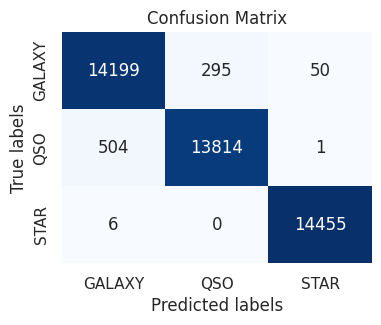

In [163]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred5)
class_names=['GALAXY','QSO','STAR']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

<Axes: xlabel='Algorithm'>

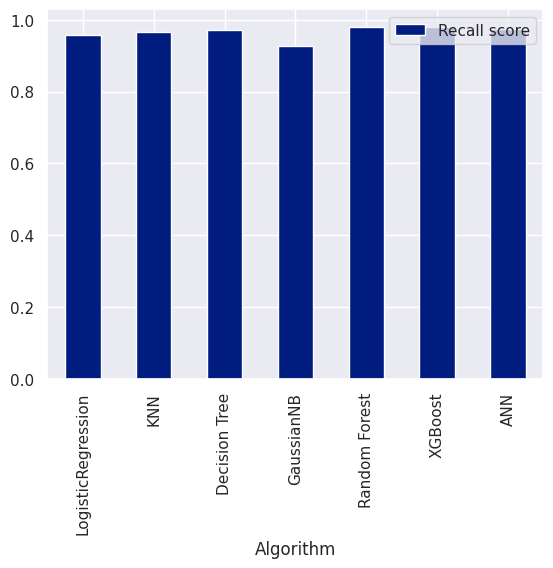

In [164]:
score_df.plot(x="Algorithm", y="Recall score", kind="bar")

<Axes: xlabel='Algorithm'>

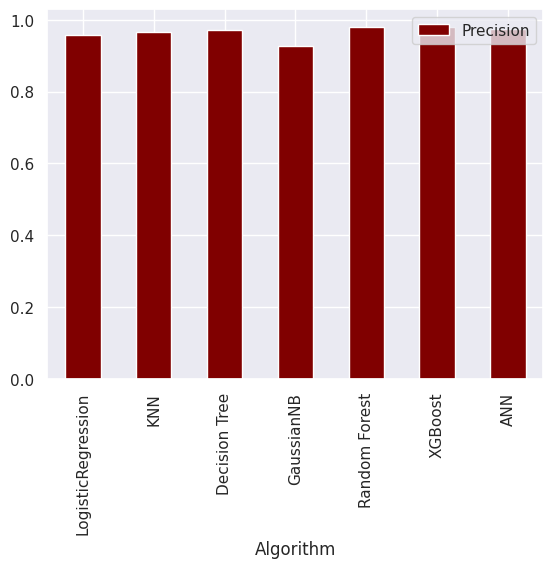

In [165]:
score_df.plot(x="Algorithm", y="Precision", kind="bar",color="maroon")

<Axes: xlabel='Algorithm'>

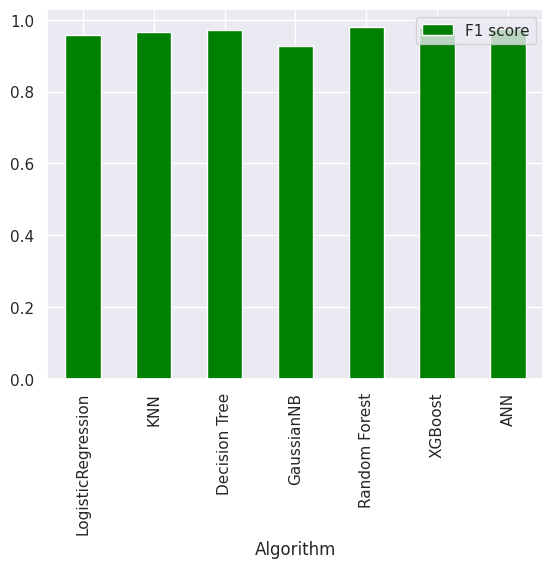

In [166]:
score_df.plot(x="Algorithm", y="F1 score", kind="bar",color="green")

<Axes: xlabel='Algorithm'>

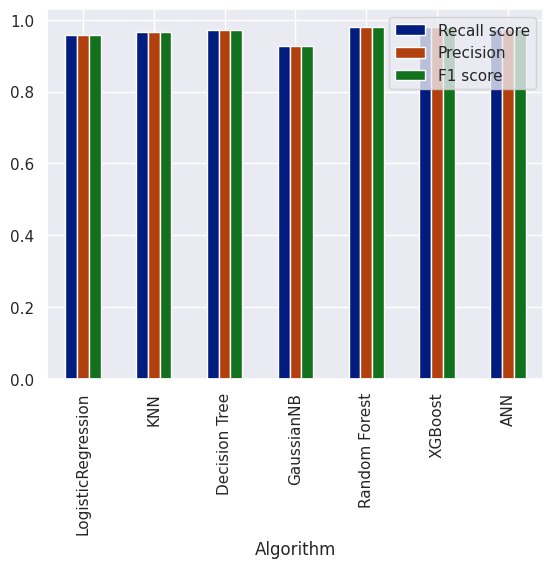

In [167]:
import pandas as pd
import matplotlib.pyplot as plot
score_df.plot(x="Algorithm", y=["Recall score", "Precision","F1 score"], kind="bar")

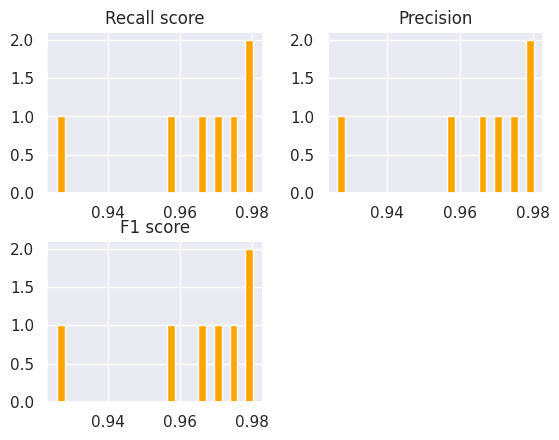

In [168]:
score_df.hist(bins =25, color="orange")
plt.show()

<Axes: >

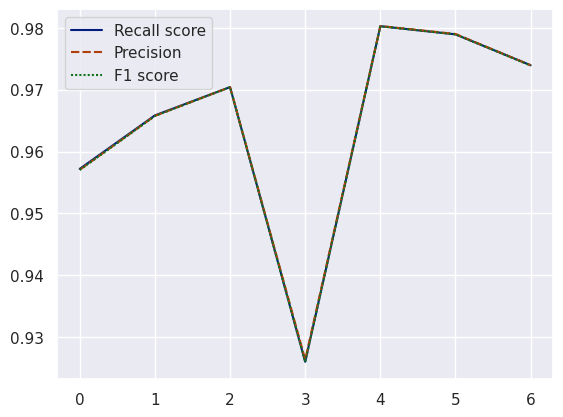

In [169]:
import seaborn as sns
sns.lineplot(data=score_df)